In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import string
import gensim
import operator
import re

In [25]:
df_movies = pd.read_csv('/content/movies1.csv')
df_movies.head()

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


In [26]:
from spacy.lang.en.stop_words import STOP_WORDS

spacy_nlp = spacy.load('en_core_web_sm')

#create list of punctuations and stopwords
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

#function for data cleaning and processing
#This can be further enhanced by adding / removing reg-exps as desired.

def spacy_tokenizer(sentence):

    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #remove digits adnd words containing digits
    sentence = re.sub('\w*\d\w*','',sentence)

    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove unwanted lines starting from special charcters
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)

    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)

    #remove punctunations
    sentence = re.sub(r'[^\w\s]',' ',sentence)

    #creating token object
    tokens = spacy_nlp(sentence)

    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]

    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]

    #return tokens
    return tokens

In [27]:
print ('Cleaning and Tokenizing...')
%time df_movies['wiki_plot_tokenized'] = df_movies['wiki_plot'].map(lambda x: spacy_tokenizer(x))

df_movies.head()

Cleaning and Tokenizing...
CPU times: user 34.6 s, sys: 162 ms, total: 34.7 s
Wall time: 47.2 s


,rank,title,genre,wiki_plot,imdb_plot,wiki_plot_tokenized
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","[day, daughter, wedding, vito, corleone, hear,..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","[banker, andy, dufresne, convict, murder, wife..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"[germans, polish, jews, kraków, ghetto, world,..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","[brief, scene, age, overweight, italian, ameri..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...","[early, december, american, expatriate, rick, ..."


In [28]:
movie_plot = df_movies['wiki_plot_tokenized']
movie_plot[0:5]

0    [day, daughter, wedding, vito, corleone, hear,...
1    [banker, andy, dufresne, convict, murder, wife...
2    [germans, polish, jews, kraków, ghetto, world,...
3    [brief, scene, age, overweight, italian, ameri...
4    [early, december, american, expatriate, rick, ...
Name: wiki_plot_tokenized, dtype: object

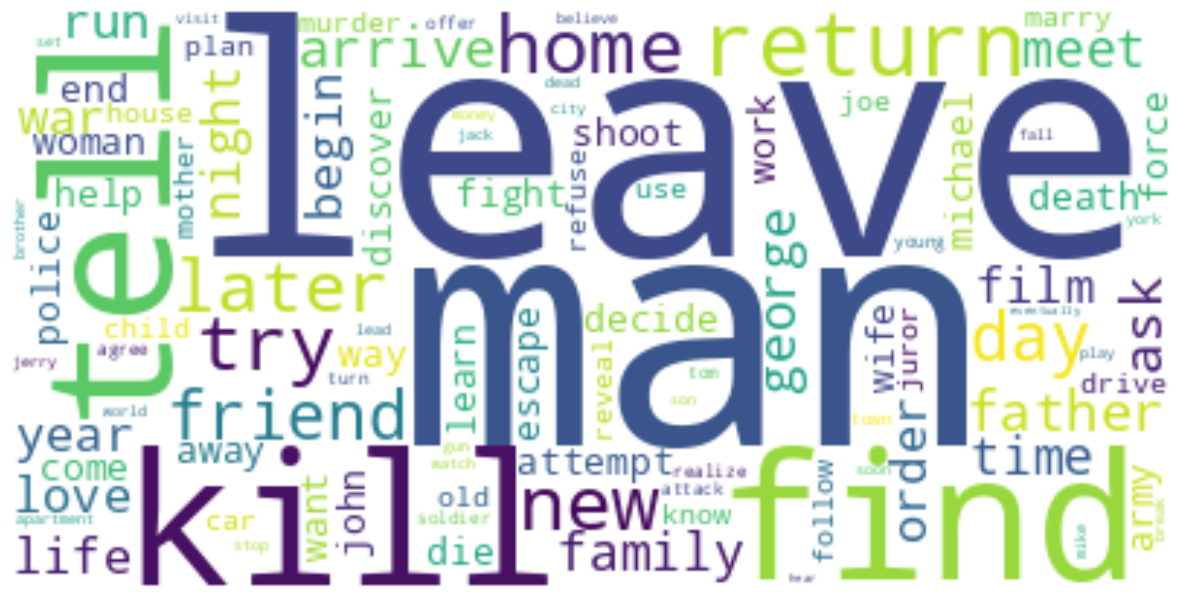

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(movie_plot)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
from gensim import corpora

#creating term dictionary
%time dictionary = corpora.Dictionary(movie_plot)

#filter out terms which occurs in less than 4 documents and more than 20% of the documents.
#NOTE: Since we have smaller dataset, we will keep this commented for now.

#dictionary.filter_extremes(no_below=4, no_above=0.2)

#list of few which which can be further removed
stoplist = set('hello and if this can would should could tell ask stop come go')
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)

CPU times: user 111 ms, sys: 1.84 ms, total: 113 ms
Wall time: 124 ms


In [31]:
#print top 50 items from the dictionary with their unique token-id
dict_tokens = [[[dictionary[key], dictionary.token2id[dictionary[key]]] for key, value in dictionary.items() if key <= 50]]
print (dict_tokens)

[[['abrasive', 0], ['abroad', 1], ['abuse', 2], ['accept', 3], ['accuse', 4], ['act', 5], ['adams', 6], ['add', 7], ['address', 8], ['agree', 9], ['ambush', 10], ['angeles', 11], ['answer', 12], ['anthony', 13], ['apollonia', 14], ['arrange', 15], ['ask', 16], ['assassin', 17], ['assassination', 18], ['associate', 19], ['attack', 20], ['attempt', 21], ['authority', 22], ['aware', 23], ['baron', 24], ['barzini', 25], ['battle', 26], ['bed', 27], ['betrayal', 28], ['bodyguard', 29], ['bomb', 30], ['booth', 31], ['brasi', 32], ['brasis', 33], ['break', 34], ['bronx', 35], ['brother', 36], ['business', 37], ['buy', 38], ['capo', 39], ['capos', 40], ['captain', 41], ['car', 42], ['career', 43], ['carlo', 44], ['casino', 45], ['christening', 46], ['christmas', 47], ['clampdown', 48], ['clemenza', 49], ['collapse', 50]]]


In [32]:
corpus = [dictionary.doc2bow(desc) for desc in movie_plot]

word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

print(word_frequencies)

[[('abrasive', 2), ('abroad', 2), ('abuse', 4), ('accept', 6), ('accuse', 2), ('act', 2), ('adams', 3), ('add', 2), ('address', 2), ('agree', 2), ('ambush', 2), ('angeles', 2), ('answer', 2), ('anthony', 3), ('apollonia', 2), ('arrange', 2), ('ask', 2), ('assassin', 4), ('assassination', 4), ('associate', 2), ('attack', 4), ('attempt', 4), ('authority', 2), ('aware', 2), ('baron', 2), ('barzini', 7), ('battle', 2), ('bed', 2), ('betrayal', 2), ('bodyguard', 2), ('bomb', 2), ('booth', 2), ('brasi', 3), ('brasis', 2), ('break', 2), ('bronx', 2), ('brother', 6), ('business', 6), ('buy', 2), ('capo', 1), ('capos', 2), ('captain', 2), ('car', 2), ('career', 2), ('carlo', 7), ('casino', 2), ('christening', 4), ('christmas', 2), ('clampdown', 2), ('clemenza', 3), ('collapse', 2), ('come', 4), ('command', 2), ('confess', 2), ('confront', 2), ('connection', 2), ('connie', 4), ('connies', 2), ('consigliere', 5), ('contact', 2), ('corleone', 10), ('corleones', 4), ('corps', 3), ('coveted', 2), ('

In [33]:
%time movie_tfidf_model = gensim.models.TfidfModel(corpus, id2word=dictionary)
%time movie_lsi_model = gensim.models.LsiModel(movie_tfidf_model[corpus], id2word=dictionary, num_topics=300)

CPU times: user 39.1 ms, sys: 0 ns, total: 39.1 ms
Wall time: 45.9 ms
CPU times: user 2.52 s, sys: 564 ms, total: 3.08 s
Wall time: 1.76 s


In [34]:
%time gensim.corpora.MmCorpus.serialize('movie_tfidf_model_mm', movie_tfidf_model[corpus])
%time gensim.corpora.MmCorpus.serialize('movie_lsi_model_mm',movie_lsi_model[movie_tfidf_model[corpus]])

CPU times: user 136 ms, sys: 56.2 ms, total: 193 ms
Wall time: 141 ms
CPU times: user 81.6 ms, sys: 4.98 ms, total: 86.5 ms
Wall time: 86.9 ms


In [35]:
#Load the indexed corpus
movie_tfidf_corpus = gensim.corpora.MmCorpus('movie_tfidf_model_mm')
movie_lsi_corpus = gensim.corpora.MmCorpus('movie_lsi_model_mm')

print(movie_tfidf_corpus)
print(movie_lsi_corpus)

MmCorpus(100 documents, 8400 features, 25983 non-zero entries)
MmCorpus(100 documents, 100 features, 10000 non-zero entries)


In [36]:
from gensim.similarities import MatrixSimilarity

%time movie_index = MatrixSimilarity(movie_lsi_corpus, num_features = movie_lsi_corpus.num_terms)

CPU times: user 21 ms, sys: 0 ns, total: 21 ms
Wall time: 33.8 ms


##Time for Semantic Search
With the index of movies initialized and loaded, we can use it to find similar movies based

We will input a search query and model will return relevant movie titles with "Relevance %" which is the similarity score. The higher the similarity score, the more similar the query to the documetn at the given index

Below is the helper function to search the index, sort and return the results

In [37]:
from operator import itemgetter

def search_similar_movies(search_term):

    query_bow = dictionary.doc2bow(spacy_tokenizer(search_term))
    query_tfidf = movie_tfidf_model[query_bow]
    query_lsi = movie_lsi_model[query_tfidf]

    movie_index.num_best = 5

    movies_list = movie_index[query_lsi]

    movies_list.sort(key=itemgetter(1), reverse=True)
    movie_names = []

    for j, movie in enumerate(movies_list):
      movie_names.append (
            {
                'Relevance': round((movie[1] * 100),2),
                'Movie Title': df_movies['title'][movie[0]],
                'Movie Plot': df_movies['wiki_plot'][movie[0]]
            }

        )

      if j == (movie_index.num_best-1):
            break

    return pd.DataFrame(movie_names, columns=['Relevance','Movie Title','Movie Plot'])

In [38]:
# search for movie tiles that are related to below search parameters
search_similar_movies('crime and drugs ')

,Relevance,Movie Title,Movie Plot
0,81.88,Goodfellas,"Henry Hill (Liotta) admits, ""As far back as I ..."
1,33.94,The French Connection,"In Marseille, an undercover detective is follo..."
2,32.09,The Godfather,"On the day of his only daughter's wedding, Vit..."
3,28.86,A Clockwork Orange,"In futuristic London, Alex DeLarge is the lead..."
4,13.16,On the Waterfront,Mob-connected union boss Johnny Friendly (Lee ...


The model returns movie titles with "Relevance %". Definitely, the top list movies are related to crimes and drugs.

In [39]:
# search for movie tiles that are related to below search parameters
search_similar_movies('violence protest march')

,Relevance,Movie Title,Movie Plot
0,74.08,Gandhi,The screenplay of Gandhi is available as a pub...
1,52.19,A Clockwork Orange,"In futuristic London, Alex DeLarge is the lead..."
2,27.03,Amadeus,The story begins in 1823 as the elderly Antoni...
3,24.64,All Quiet on the Western Front,\n\n\n\n\nThis section's plot summary may be t...
4,18.32,The Best Years of Our Lives,"After World War II, Fred Derry (Dana Andrews),..."


Here the top most movie title "Gandhi" is surely related to non-violence protests

In [40]:
# search for movie tiles that are related to below search parameters
search_similar_movies('love affair hate')

,Relevance,Movie Title,Movie Plot
0,45.70,Terms of Endearment,Aurora Greenway (Shirley MacLaine) and her dau...
1,44.78,The Graduate,"Benjamin Braddock, going on from twenty to twe..."
2,30.33,From Here to Eternity,"In 1941, bugler and career soldier Private Rob..."
3,28.83,Out of Africa,"The story begins in 1913 in Denmark, when Kare..."
4,27.63,Wuthering Heights,A traveller named Lockwood (Miles Mander) is c...


In [41]:
# search for movie tiles that are related to below search parameters
search_similar_movies('anger hate')

,Relevance,Movie Title,Movie Plot
0,44.45,The King's Speech,"Prince Albert, Duke of York, the second son of..."
1,43.72,West Side Story,] ] \n In the West Side's Lincoln Square ne...
2,35.93,All Quiet on the Western Front,\n\n\n\n\nThis section's plot summary may be t...
3,33.44,Wuthering Heights,A traveller named Lockwood (Miles Mander) is c...
4,33.17,Gandhi,The screenplay of Gandhi is available as a pub...


In [45]:
def search_similar_movies_manual():
  search_term = input("Enter your search term: ")
  results = search_similar_movies(search_term)
  print(results)

search_similar_movies_manual()


Enter your search term: horror
   Relevance            Movie Title  \
0      75.44         Apocalypse Now   
1      54.99           The Exorcist   
2      35.38                 Psycho   
3       0.00          The Apartment   
4      -0.00  The French Connection   

                                          Movie Plot  
0  In 1969, U.S. Army Captain and special operati...  
1  Lankester Merrin is a veteran Catholic priest ...  
2  Patrick Bateman is a wealthy investment banker...  
3  Calvin Clifford (C. C.) "Bud" Baxter (Jack Lem...  
4  In Marseille, an undercover detective is follo...  


In [49]:
from sklearn.metrics import accuracy_score
y_true = [1, 0, 1, 1, 0, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1, 0]
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.5714285714285714


In general usage, computing semantic relationships between textual data enables to recommend articles or products related to given query, to follow trends, to explore a specific subject in more details.